# **Regresión Logística**


En este laboratorio, aprenderá y practicará con el modelo de regresión logística, un modelo de clasificación popular y eficaz. Entender la regresión logística y ser capaz de aplicarla a las tareas de clasificación es esencial porque los modelos de regresión logística constituyen los fundamentos de las redes neuronales.

Utilizaremos un conjunto de datos del mundo real que contiene información nutricional detallada sobre alimentos para personas con diabetes. El objetivo es clasificar si un paciente diabético debe elegir Más a menudo, Menos a menudo o Con moderación para un alimento específico basándose en la información nutricional del conjunto de datos.


## Objetivos


Después de completar este laboratorio podrás:

* Preprocesar y generar conjuntos de datos de entrenamiento y prueba
* Entrenar y afinar los modelos de regresión logística
* Interpretar los modelos de regresión logística entrenados
* Evaluar los modelos de regresión logística entrenados


***


## Preparar y configurar el entorno del laboratorio


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Seleccionamos un random state para que aquellos resultados aleatorios coincidan entre alumnos.
rs = 123

## EDA


### Cargar y explorar el conjunto de datos

En primer lugar, carguemos el conjunto de datos como un marco de datos `Pandas` y realicemos algunas tareas básicas de EDA sobre él.


In [ ]:
food_df = pd.read_csv("food_items.csv")


Y, vamos a comprobar rápidamente sus tipos de columna.


In [ ]:
food_df.dtypes

Unnamed: 0               int64
Calories               float64
Total Fat                int64
Saturated Fat          float64
Monounsaturated Fat    float64
Polyunsaturated Fat    float64
Trans Fat              float64
Cholesterol              int64
Sodium                 float64
Total Carbohydrate     float64
Dietary Fiber          float64
Sugars                 float64
Sugar Alcohol            int64
Protein                float64
Vitamin A                int64
Vitamin C                int64
Calcium                  int64
Iron                     int64
class                   object
dtype: object

Muestra los diez primeros alimentos:

In [ ]:

food_df.head(10)

,Unnamed: 0,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
1,1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
2,2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
3,3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
4,4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,'In Moderation'
5,5,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
6,6,142.0,0,0.0,0.0,0.0,0.0,0,12.0,10.6,0.0,0.0,0,1.2,0,0,0,0,'In Moderation'
7,7,102.0,0,0.0,0.0,0.0,0.0,0,13.0,5.0,0.0,0.0,0,0.7,0,0,0,0,'In Moderation'
8,8,145.0,0,0.0,0.0,0.0,0.0,0,17.0,11.0,0.0,0.0,0,1.2,0,0,0,0,'In Moderation'
9,9,171.0,0,0.0,0.0,0.0,0.0,0,8.0,13.7,0.0,0.0,0,2.5,0,0,0,0,'In Moderation'


Calcula las estadísticas descriptivas:


In [ ]:
#INSERTA AQUÍ TU CÓDIGO
food_df.describe()

,Unnamed: 0,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
count,13260.00000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000
mean,6629.50000,133.861086,4.475264,1.450617,0.338069,0.254660,0.047459,8.857692,241.867142,18.232020,1.602971,6.645234,0.117949,4.661333,6.287632,6.741855,5.175264,5.235671
std,3827.97662,94.227650,5.386340,2.410318,1.345852,2.230586,0.321402,20.976530,272.284363,14.786316,3.363879,8.328465,1.121529,5.611143,18.374191,23.785100,8.779637,9.119459
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3314.75000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,6629.50000,120.000000,3.000000,0.500000,0.000000,0.000000,0.000000,0.000000,135.000000,17.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,2.000000,2.000000
75%,9944.25000,180.000000,7.000000,2.000000,0.000000,0.000000,0.000000,10.000000,370.000000,27.000000,2.000000,11.000000,0.000000,7.000000,6.000000,2.000000,6.000000,8.000000
max,13259.00000,2210.000000,43.000000,22.000000,40.000000,235.000000,11.000000,450.000000,2431.000000,270.000000,305.000000,115.000000,31.000000,70.000000,622.000000,1000.000000,110.000000,170.000000


Como podemos ver en la salida anterior, este conjunto de datos contiene 17 categorías de nutrientes sobre cada alimento. Estas categorías incluyen las calorías, la grasa total, las proteínas, el azúcar, etc., y aparecen como variables numéricas. Como tales, sólo necesitamos escalarlas para entrenar nuestro modelo de regresión logística, de modo que podamos comparar nuestros coeficientes de características directamente.


A continuación, vamos a comprobar la variable independiente,la columna `class`, para ver los valores de las etiquetas y su distribución.


In [ ]:
food_df.iloc[:, -1].value_counts(normalize=True)

'In Moderation'    0.501433
'Less Often'       0.423906
'More Often'       0.074661
Name: class, dtype: float64

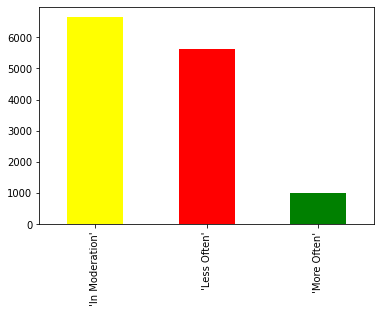

In [ ]:
food_df.iloc[:, -1].value_counts().plot.bar(color=['yellow', 'red', 'green'])

Como podemos ver en el gráfico de barras anterior, este conjunto de datos tiene tres clases: "Con moderación", "Menos a menudo" y "Más a menudo". Las tres etiquetas están desequilibradas. Para los pacientes diabéticos, la mayoría de los alimentos se encuentran en las categorías "Con moderación" y "Con menos frecuencia". Esto hace que la gestión de la dieta de los diabéticos sea muy difícil, por lo que podríamos construir un modelo de aprendizaje automático para ayudar a los pacientes a elegir sus alimentos.


Tenemos tres etiquetas, lo que significa que nuestro modelo de regresión logística será multinomial con tres clases.

Una regresión logística multinomial es un modelo de regresión logística generalizada que genera una distribución de probabilidad sobre todas las clases, basada en los logaritmos o logaritmos exponenciales calculados para cada clase (normalmente más de dos).


### Feature Engineering


Ahora debería tener unos conocimientos básicos sobre el conjunto de datos de alimentos. A continuación, vamos a procesar el conjunto de datos en bruto y a construir los datos de entrada `X` y la etiqueta/salida `y` para el entrenamiento del modelo de regresión logística.


In [ ]:
X_raw = food_df.iloc[:, :-1]
y_raw = food_df.iloc[:, -1:]

Afortunadamente, todas las columnas de características son numéricas por lo que sólo necesitamos escalarlas. Aquí usamos el `MinMaxScaler` proporcionado por `sklearn` para escalar. Crea un objeto `scaler` y aplica el escalado con el atributo `.fit_transform()``. 


In [ ]:
# INSERTA AQUÍ TU CÓDIGO
scaler = MinMaxScaler()
X = scaler.fit_transform(X_raw)

Comprobemos el rango de valores de las características escaladas:


In [ ]:
print(f"The range of feature inputs are within {X.min()} to {X.max()}")

The range of feature inputs are within 0.0 to 1.0


Para la variable objetivo `y`, vamos a utilizar el `LabelEncoder` proporcionado por `sklearn` para codificar sus tres valores de clase.


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y = label_encoder.fit_transform(y_raw.values.ravel())

La variable de destino codificada sólo contendrá los valores `0=En moderación`, `1=Menos a menudo`, `2=Más a menudo`.

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([6649, 5621,  990]))

## Entrenando modelos de regresión logística

En primer lugar, vamos a dividir el conjunto de datos de entrenamiento y de prueba. El conjunto de datos de entrenamiento se utilizará para entrenar y ajustar los modelos, y el conjunto de datos de prueba se utilizará para evaluar los modelos. Tenga en cuenta que también puede dividir un conjunto de datos de validación del conjunto de datos de entrenamiento sólo para el ajuste del modelo.

Realiza la división habitual entre test y train, pero añade el parámetro `stratify=y`. Este parámetro asegura que la proporción entre categorías se mantiene similar entre test y train, y no nos quedamos todos los "More often" en el train, por ejemplo.

In [ ]:
#INSERTA AQUÍ TU CÓDIGO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

Veamos las formas de los conjuntos de datos divididos:


In [ ]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (10608, 18), y_train: (10608,)


In [ ]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (2652, 18), y_test: (2652,)


Bien, ahora que tenemos listos los conjuntos de datos de entrenamiento y de prueba, vamos a empezar la tarea de entrenamiento del modelo.

Primero definimos un modelo `sklearn.linear_model.LogisticRegression` con los siguientes argumentos, puedes revisar el comentario de cada argumento para saber qué significa.


In [ ]:
# Tipo de penalización para la reducció de los coeficientes
penalty= 'l2'
# El tipo de problema
multi_class = 'multinomial'
# Cada penalización y tipo de problema utilza un tipo de solver diferente. En est e caso:
solver = 'lbfgs'
# Número de iteraciones
max_iter = 1000

In [ ]:
# INSERTA AQUÍ TU CÓDIGO
l2_model = LogisticRegression(random_state=rs, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

Vamos a entrenar el modelo con los datos de entrada de entrenamiento `X_train` y las etiquetas `y_train`:


In [ ]:
l2_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=123)

In [ ]:
l2_preds = l2_model.predict(X_test)

Los modelos de clasificación tienen una lista de métricas considerablemente larga. En el caso de la regresión es mas sencillo, teníamos el RMSE quiea med el tamañano de los errores y el $R^2$ que medía lo bien que se ajustaría el modelo de ser lineal.
Iciso: En el claso de la clasificación miraremos las siguientes:
*   accuracy : Simplemente es acertadas / totales.
*   recall : El número de aciertos dividido el numero de aciertos + valores que deberían estar en esa categoría y no lo estan. Es una forma de medir como de bien se asignan los valores que "ya conociamos". 
* precision : El número de aciertos dividido entre el número de acierto + fallidos en esa categoría. Si elegimos un producto una vez asignado, es la probabilidad que de verdad pertenezca a esa categoría.
* f1score: Un computo entre las 2 anteriores.

Para facilitar la obtención de estas métricas dejamos la fuinción siguiente:

In [ ]:
def evaluate_metrics(y_test, y_pred):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(y_test, y_pred)
    precision, recall, f_beta, _ = precision_recall_fscore_support(y_test, y_pred)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

Ejecuta la función anterior para revisar como de acertado es nuestro modelo:

In [ ]:
# INSERTA AQUÍ TU CÓDIGO
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.7699849170437406,
 'recall': array([0.86766917, 0.73309609, 0.32323232]),
 'precision': array([0.72715816, 0.83485309, 0.82051282]),
 'f1score': array([0.79122386, 0.78067267, 0.46376812])}

Como podemos ver en los resultados de la evaluación anterior, el modelo de regresión logística tiene un rendimiento relativamente bueno en esta tarea de clasificación multinomial. La precisión global es de alrededor de `0,77` y la puntuación f1 es de alrededor de `0,8`. Tenga en cuenta que para la "recuperación", la "precisión" y la "puntuación f1", mostramos los valores de cada clase para ver cómo funciona el modelo en una clase individual. Y, podemos ver en los resultados, que el recuerdo de la "clase=2" (más a menudo) no es muy bueno. Este es un problema común llamado desafío de clasificación desequilibrada.

Una forma visual de comprobar como de buenos han sido nuestros resultados es mediante un gráfico de calor:

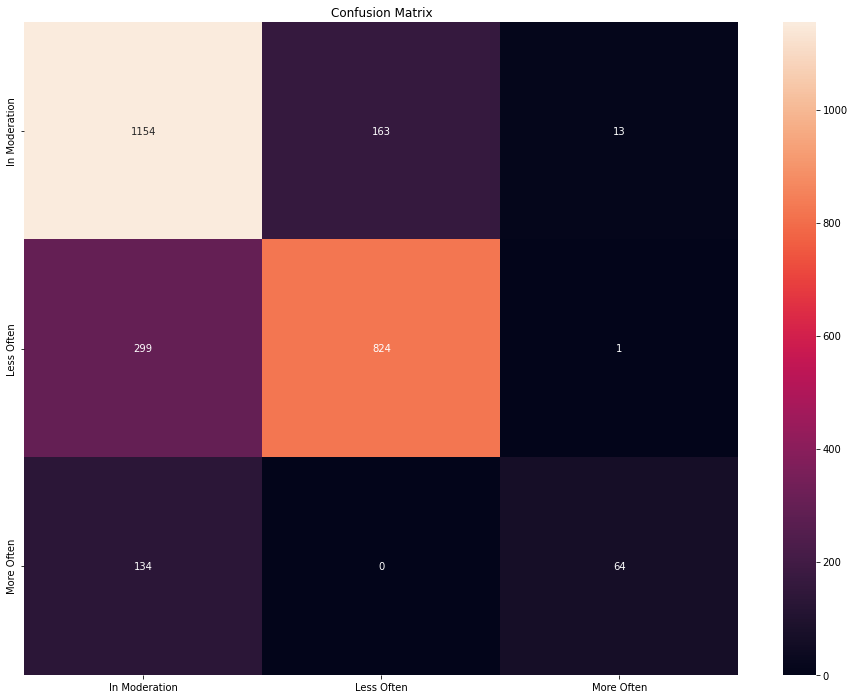

In [ ]:
cf = confusion_matrix(y_test, l2_preds)
plt.figure(figsize=(16, 12))
ax = sns.heatmap(cf, annot=True, fmt="d", xticklabels=["In Moderation", "Less Often", "More Often"], 
                 yticklabels=["In Moderation", "Less Often", "More Often"])
ax.set(title="Confusion Matrix");

#### Ejercicio

Crea un modelo de regresión con penalización `l1`, clase `multinomial`, solver `saga` y 1000 iteraciones. Posteriormente entrena el modelo con el conjunto train.y realiza las predicciones del conjunto test. Calcula las métricas con la función definida anteriormente y compararas con la penalización `l2`, ¿Qué caso da mejores resultados? Realiza también el gráfico de calor y comparalo con el anterior.

In [ ]:
#INSERTA AQUÍ TU CÓDIGO
penalty= #'l1'
multi_class = #'multinomial'
solver = #'saga'
max_iter = #1000
l1_model = LogisticRegression(random_state=rs, penalty=penalty, multi_class=multi_class, solver=solver, max_iter = 1000)
l1_model.fit(X_train, y_train)
l1_preds = l1_model.predict(X_test)

In [ ]:
evaluate_metrics(y_test, l1_preds)

In [ ]:
cf = confusion_matrix(y_test, l2_preds)
plt.figure(figsize=(16, 12))
ax = sns.heatmap(cf, annot=True, fmt="d", xticklabels=["In Moderation", "Less Often", "More Often"], 
                 yticklabels=["In Moderation", "Less Often", "More Often"])
ax.set(title="Confusion Matrix");